In [8]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

Обрати реальні дані з kaggle або сгенерувати випадкові дані, що містять розподіл деякої ознаки в двох групах.

In [9]:
database = sns.load_dataset('titanic')
database


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [10]:
data = pd.DataFrame({
    'who':database['who'],      
    'alive':database['alive']
})

data

,who,alive
0,man,no
1,woman,yes
2,woman,yes
3,woman,yes
4,man,no
...,...,...
886,man,no
887,woman,yes
888,woman,no
889,man,yes


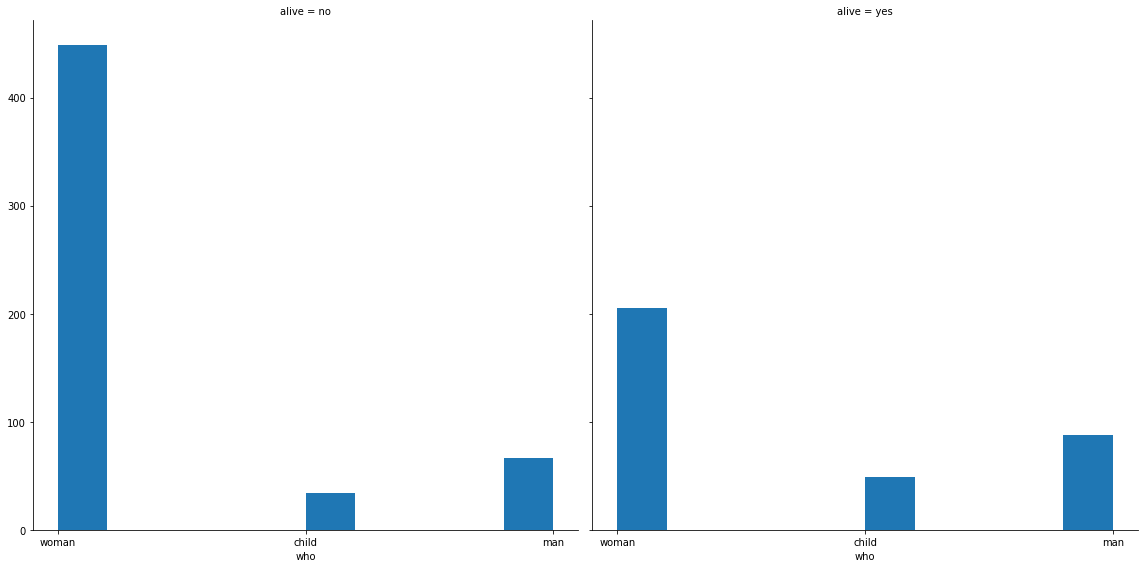

In [11]:
g = sns.FacetGrid(database, col="alive", height= 8)
g = g.map(plt.hist, "who");

In [54]:
print("-"*40)
print("Робота функції")
uniq1 = []           #Градация признака
for i in data.iloc[:,0]:
    bl = True
    for j in uniq1:
        if(i == j):
            bl = False
    if(bl):
        uniq1.append(i)

uniq2 = []           #Группы
for i in data.iloc[:,1]:
    bl = True
    for j in uniq2:
        if(i == j):
            bl = False
    if(bl):
        uniq2.append(i)

uniq1 = np.sort(uniq1)
uniq2 = np.sort(uniq2)

table_pirs = pd.DataFrame({               #Таблица частот, для заданных данных
    (uniq2[0]):[0 for i in range(len(uniq1))],
    (uniq2[1]):[0 for i in range(len(uniq1))]
}, index = uniq1);

table_pirs.index.name = data.columns[0]

#print(table_pirs['no'])
for i in range(len(data)):                #частоты совпадений группы и признака
    table_pirs[data.iloc[i,1]][data.iloc[i,0]] += 1
    
print(table_pirs)

print(sum(table_pirs.iloc[:,0]))
print(sum(table_pirs.iloc[:,1]))

if (sum(table_pirs.iloc[:,0]) != sum(table_pirs.iloc[:,1])):
    table_pirs[table_pirs.columns[1]] = [
        x/sum(table_pirs.iloc[:,1])*sum(table_pirs.iloc[:,0]) # перерасчет конкретной(x-вого рядка) частоты
        for x in table_pirs.iloc[:,1] # Проход по всем частотом группы
    ]
table_pirs['(ni-ni`)'] = [(table_pirs.iloc[i,0] - table_pirs.iloc[i,1]) for i in range(len(table_pirs))]
table_pirs['(ni-ni`)^2/ni`'] = [(table_pirs.iloc[i,2]**2/table_pirs.iloc[i,1]) for i in range(len(table_pirs))]
print("\nКінцева таблиця спряженості:")
print(table_pirs)

chi2 =  sum(table_pirs.iloc[:,3])
print("\nX^2(емпіричне) - " + str(chi2))

r = len(table_pirs)-1
print("ступінь свободи - " + str(r))

crit_pirson = pd.read_excel("table_Pirson.xlsx").iloc[r, 1 if(significant_level == 0.01) else 2]
print("X^2(табличне) - " + str(crit_pirson))
print("-"*40)

----------------------------------------
Робота функції
        no  yes
who            
child   34   49
man    449   88
woman   66  205
549
342

Кінцева таблиця спряженості:
        no         yes    (ni-ni`)  (ni-ni`)^2/ni`
who                                               
child   34   78.657895  -44.657895       25.354449
man    449  141.263158  307.736842      670.393933
woman   66  329.078947 -263.078947      210.315893

X^2(емпіричне) - 906.0642742161024
ступінь свободи - 2


FileNotFoundError: [Errno 2] No such file or directory: 'table_Pirson.xlsx'

In [13]:
print("Результат роботи - " + str(pirson_criterion(data,0.01)))

----------------------------------------
Робота функції
Початкова таблиця спряженості:
        no  yes
who            
child   34   49
man    449   88
woman   66  205

Кінцева таблиця спряженості:
        no         yes    (ni-ni`)  (ni-ni`)^2/ni`
who                                               
child   34   78.657895  -44.657895       25.354449
man    449  141.263158  307.736842      670.393933
woman   66  329.078947 -263.078947      210.315893

X^2(емпіричне) - 906.0642742161024
ступінь свободи - 2
X^2(табличне) - 9.2
----------------------------------------
Результат роботи - Статистичная розбіжність присутня 906.06(емп) > 9.2(табл)
